In [1]:
import cv2
from pathlib import Path
import pandas as pd
import numpy as np
from skimage.draw import polygon
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../src')
import utils

In [2]:
# Example video path from your CSV
file_name = 'CR3dca6a2-CR3dca9db-000065.avi'
video_path = f'/home/paul/Downloads/econet_ped/echonetpediatric/pediatric_echo_avi/pediatric_echo_avi/A4C/Videos/' + file_name
video_tensor = utils.avi2video(video_path)
video_tensor.shape

(62, 112, 112)

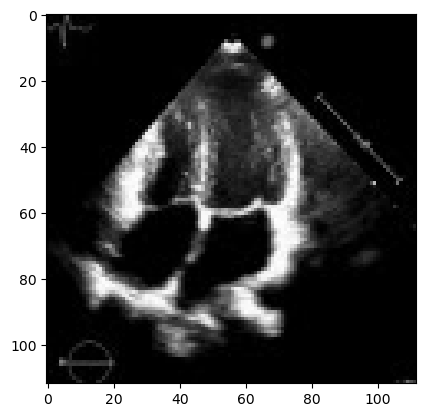

In [3]:
plt.imshow(video_tensor[47], cmap='gray')

In [4]:
# read the tracings csv and extract the correct file
path_tracings_csv = '/home/paul/Downloads/econet_ped/echonetpediatric/pediatric_echo_avi/pediatric_echo_avi/A4C/VolumeTracings.csv'
df_tracings = pd.read_csv(path_tracings_csv)

In [21]:
df_tracings['Frame'].value_counts().sort_index()

Frame
1               1711
10               944
100              248
101              270
102              297
                ... 
97               338
98               168
99               141
No Diastolic      49
No Systolic       70
Name: count, Length: 214, dtype: int64

In [42]:
test_subject_tracings = df_tracings[df_tracings['FileName'] == file_name]
test_subject_tracings.head()

,FileName,X,Y,Frame
58419,CR3dca6a2-CR3dca9db-000065.avi,49.0,57.0,48
58420,CR3dca6a2-CR3dca9db-000065.avi,52.0,46.0,48
58421,CR3dca6a2-CR3dca9db-000065.avi,53.0,34.0,48
58422,CR3dca6a2-CR3dca9db-000065.avi,55.0,26.0,48
58423,CR3dca6a2-CR3dca9db-000065.avi,57.0,25.0,48


In [43]:
df_ed, df_es,_,_ = utils.extract_ed_es_tracings(df_tracings, file_name)

In [44]:
mask_ed = utils.binary_mask_from_pediatric_tracings(df_ed)
mask_es = utils.binary_mask_from_pediatric_tracings(df_es)

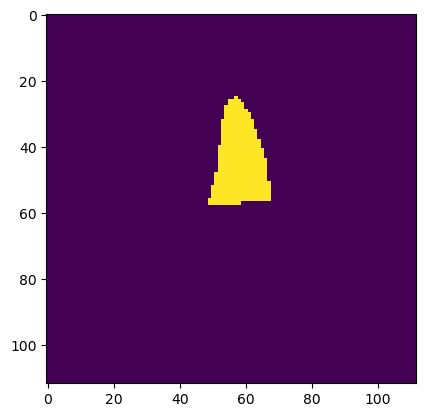

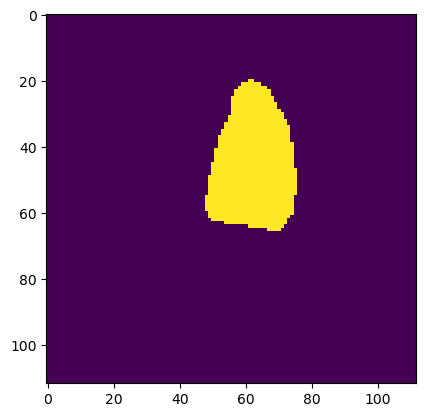

In [45]:
plt.imshow(mask_ed)
plt.show()
plt.imshow(mask_es)
plt.show()

In [ ]:
traces_mask_ed = utils.extract_lv_axes(mask_ed)
traces_mask_es = utils.extract_lv_axes(mask_es)

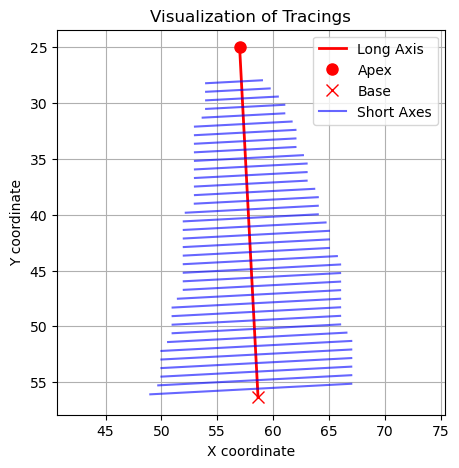

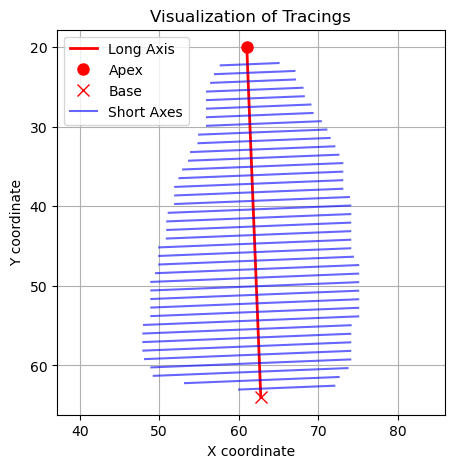

In [50]:
utils.plot_long_short_axis(traces_mask_ed)
utils.plot_long_short_axis(traces_mask_es)

In [51]:
vol_ed_mask = utils.calculate_volume_from_tracings(traces_mask_ed)
vol_es_mask = utils.calculate_volume_from_tracings(traces_mask_es)

# GT LVEF
lvef_mask = (vol_es_mask - vol_ed_mask) / vol_es_mask
print('Mask lvef:', lvef_mask)

Mask lvef: 0.741455442996428


In [52]:
data_csv = pd.read_csv('/home/paul/Downloads/econet_ped/echonetpediatric/pediatric_echo_avi/pediatric_echo_avi/A4C/FileList.csv')


In [53]:
data_csv.columns

Index(['FileName', 'EF', 'Sex', 'Age', 'Weight', 'Height', 'Split'], dtype='object')

<Axes: xlabel='Split'>

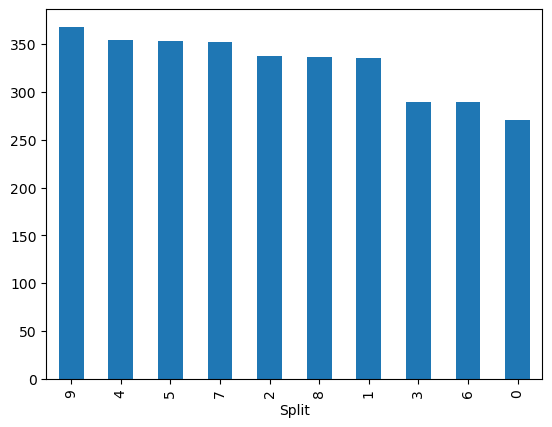

In [63]:
data_csv['Split'].value_counts().plot.bar()